<a href="https://colab.research.google.com/github/SoungbinC/CMPE_255/blob/assignment2/Assigment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# run this cell to install pycaret in Google Colab
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 483.9/483.9 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 16.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 21.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 76.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 73.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 82.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 92.6 MB/s eta 0:

In [3]:
from pycaret.utils import version
version()

'3.1.0'

In [27]:
# load sample dataset
from google.colab import files
uploaded = files.upload()


Saving test.csv to test.csv


In [28]:
import pandas as pd
import io

data =pd.read_csv(io.BytesIO(uploaded['test.csv']))

data

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,1700,1,1.9,0,0,1,54,0.5,170,...,17,644,913,2121,14,8,15,1,1,0
996,997,609,0,1.8,1,0,0,13,0.9,186,...,2,1152,1632,1933,8,1,19,0,1,1
997,998,1185,0,1.4,0,1,1,8,0.5,80,...,12,477,825,1223,5,0,14,1,0,0
998,999,1533,1,0.5,1,0,0,50,0.4,171,...,12,38,832,2509,15,11,6,0,1,0


In [29]:
# import pycaret classification and init setup
from pycaret.classification import *
s = setup(data, target = 'touch_screen', session_id = 123)

,Description,Value
0,Session id,123
1,Target,touch_screen
2,Target type,Binary
3,Original data shape,"(1000, 21)"
4,Transformed data shape,"(1000, 21)"
5,Transformed train set shape,"(700, 21)"
6,Transformed test set shape,"(300, 21)"
7,Numeric features,20
8,Preprocess,True
9,Imputation type,simple


In [32]:
from pycaret.classification import ClassificationExperiment
exp = ClassificationExperiment()
# check the type of exp
type(exp)

pycaret.classification.oop.ClassificationExperiment

In [34]:
exp.setup(data, target = 'touch_screen', session_id = 123)

,Description,Value
0,Session id,123
1,Target,touch_screen
2,Target type,Binary
3,Original data shape,"(1000, 21)"
4,Transformed data shape,"(1000, 21)"
5,Transformed train set shape,"(700, 21)"
6,Transformed test set shape,"(300, 21)"
7,Numeric features,20
8,Preprocess,True
9,Imputation type,simple


In [35]:
# compare baseline models
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.5286,0.5216,0.4971,0.5359,0.5105,0.0571,0.0588,0.2820
dt,Decision Tree Classifier,0.5100,0.5100,0.5143,0.5073,0.5084,0.0200,0.0200,0.0310
knn,K Neighbors Classifier,0.5086,0.5000,0.5114,0.5117,0.5088,0.0171,0.0174,0.0370
et,Extra Trees Classifier,0.5071,0.5278,0.4714,0.5017,0.4812,0.0143,0.0133,0.2170
lightgbm,Light Gradient Boosting Machine,0.5057,0.5004,0.5171,0.5082,0.5115,0.0114,0.0113,0.1790
svm,SVM - Linear Kernel,0.5000,0.0000,0.3543,0.4500,0.3412,0.0000,0.0005,0.0320
dummy,Dummy Classifier,0.5000,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0230
ada,Ada Boost Classifier,0.4971,0.4767,0.4943,0.4952,0.4935,-0.0057,-0.0056,0.2660
gbc,Gradient Boosting Classifier,0.4971,0.4958,0.4943,0.4989,0.4949,-0.0057,-0.0055,0.3310
nb,Naive Bayes,0.4800,0.4752,0.5029,0.4823,0.4904,-0.0400,-0.0404,0.0290


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [36]:
# compare models using OOP
exp.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.5286,0.5216,0.4971,0.5359,0.5105,0.0571,0.0588,0.3150
dt,Decision Tree Classifier,0.5100,0.5100,0.5143,0.5073,0.5084,0.0200,0.0200,0.0580
knn,K Neighbors Classifier,0.5086,0.5000,0.5114,0.5117,0.5088,0.0171,0.0174,0.0600
et,Extra Trees Classifier,0.5071,0.5278,0.4714,0.5017,0.4812,0.0143,0.0133,0.2200
lightgbm,Light Gradient Boosting Machine,0.5057,0.5004,0.5171,0.5082,0.5115,0.0114,0.0113,0.3710
svm,SVM - Linear Kernel,0.5000,0.0000,0.3543,0.4500,0.3412,0.0000,0.0005,0.0560
dummy,Dummy Classifier,0.5000,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0260
ada,Ada Boost Classifier,0.4971,0.4767,0.4943,0.4952,0.4935,-0.0057,-0.0056,0.1440
gbc,Gradient Boosting Classifier,0.4971,0.4958,0.4943,0.4989,0.4949,-0.0057,-0.0055,0.2340
nb,Naive Bayes,0.4800,0.4752,0.5029,0.4823,0.4904,-0.0400,-0.0404,0.0520


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)

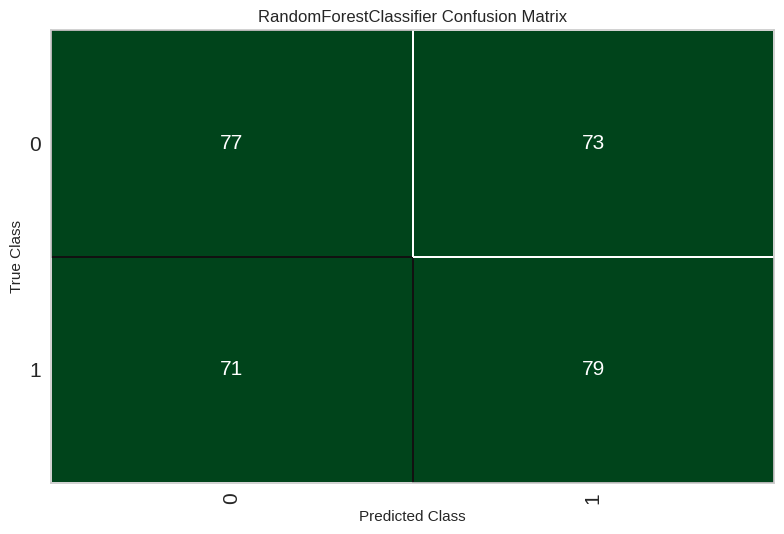

In [39]:
plot_model(best, plot = 'confusion_matrix')

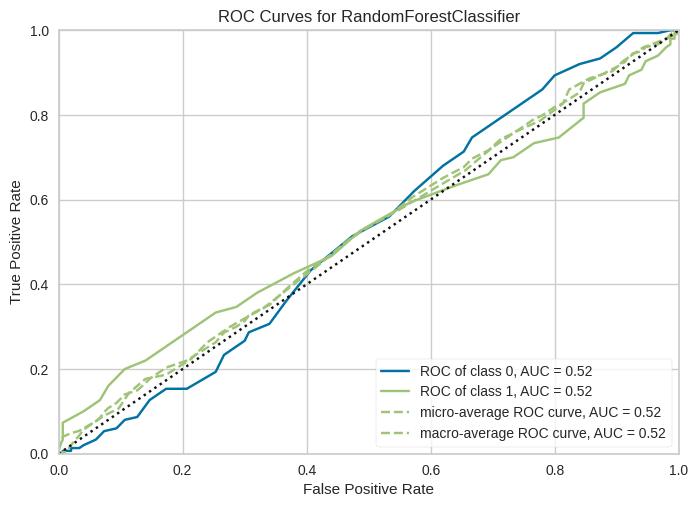

In [40]:
plot_model(best, plot = 'auc')